# XGBoost 사용하는 방법 
1. python native
2. scikitlearn

# 1. XGBoost-Python Native

In [1]:
# !pip install xgboost==1.5.0

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 106.6/106.6 MB 2.0 MB/s eta 0:00:00


In [1]:
import xgboost as xgb
print(xgb.__version__)

C:\Users\JeeYeon Kim\AppData\Roaming\Python\Python39\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


1.5.0


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['target'] = cancer.target
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    data_df.drop("target", axis=1),
    data_df['target'],
    random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    random_state=42
)

# DMatrix 변환
- 넘파이 배열, 판다스 데이터프레임에서도 변환이 가능
- feature, target을 한 번에 묶음

In [6]:
dtr = xgb.DMatrix(data=X_train, label = y_train)
dval = xgb.DMatrix(data=X_valid,label = y_valid )
dtest = xgb.DMatrix(data=X_test, label = y_test)

# 하이퍼 파라미터 설정

In [9]:
params = {
    "max_depth":3,
    "eta": 0.05,
    "objective":'binary:logistic',
    "eval_metric":'logloss'
}

num_rounds = 400

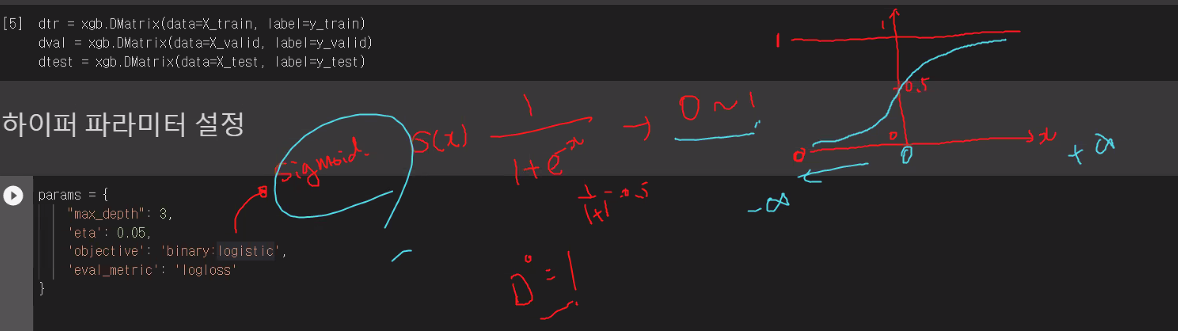
sigmoid: 0~1사이에서 s자를 그리는 함수

# 훈련

In [11]:
# 학습 데이터 세트: train
# 평가(검증)데이터 세트: eval

eval_list = [
    (dtr,'train'),
    (dval, 'eval')
]

xgb_model = xgb.train(
    params = params,
    dtrain = dtr,
    num_boost_round = num_rounds,
    early_stopping_rounds = 50, # 성능 개선이 50라운드 이내에 이루어지지 않으면 학습을 종료하겠다.
    evals = eval_list)

[0]	train-logloss:0.65124	eval-logloss:0.65404
[1]	train-logloss:0.61200	eval-logloss:0.62023
[2]	train-logloss:0.57754	eval-logloss:0.58633
[3]	train-logloss:0.54460	eval-logloss:0.55826
[4]	train-logloss:0.51435	eval-logloss:0.53266
[5]	train-logloss:0.48771	eval-logloss:0.50902
[6]	train-logloss:0.46188	eval-logloss:0.48738
[7]	train-logloss:0.43893	eval-logloss:0.46707
[8]	train-logloss:0.41664	eval-logloss:0.44913
[9]	train-logloss:0.39683	eval-logloss:0.43179
[10]	train-logloss:0.37746	eval-logloss:0.41644
[11]	train-logloss:0.36018	eval-logloss:0.40182
[12]	train-logloss:0.34321	eval-logloss:0.38998
[13]	train-logloss:0.32734	eval-logloss:0.37724
[14]	train-logloss:0.31250	eval-logloss:0.36721
[15]	train-logloss:0.29931	eval-logloss:0.35642
[16]	train-logloss:0.28621	eval-logloss:0.34786
[17]	train-logloss:0.27395	eval-logloss:0.34002
[18]	train-logloss:0.26244	eval-logloss:0.33208
[19]	train-logloss:0.25146	eval-logloss:0.32362
[20]	train-logloss:0.24147	eval-logloss:0.31627
[2

[170]	train-logloss:0.01595	eval-logloss:0.12450
[171]	train-logloss:0.01588	eval-logloss:0.12424
[172]	train-logloss:0.01579	eval-logloss:0.12395
[173]	train-logloss:0.01564	eval-logloss:0.12368
[174]	train-logloss:0.01555	eval-logloss:0.12339
[175]	train-logloss:0.01545	eval-logloss:0.12347
[176]	train-logloss:0.01537	eval-logloss:0.12291
[177]	train-logloss:0.01528	eval-logloss:0.12293
[178]	train-logloss:0.01521	eval-logloss:0.12267
[179]	train-logloss:0.01510	eval-logloss:0.12242
[180]	train-logloss:0.01501	eval-logloss:0.12216
[181]	train-logloss:0.01492	eval-logloss:0.12189
[182]	train-logloss:0.01483	eval-logloss:0.12191
[183]	train-logloss:0.01477	eval-logloss:0.12188
[184]	train-logloss:0.01469	eval-logloss:0.12133
[185]	train-logloss:0.01463	eval-logloss:0.12110
[186]	train-logloss:0.01454	eval-logloss:0.12092
[187]	train-logloss:0.01446	eval-logloss:0.12039
[188]	train-logloss:0.01437	eval-logloss:0.12059
[189]	train-logloss:0.01425	eval-logloss:0.12034
[190]	train-logloss:

[338]	train-logloss:0.00937	eval-logloss:0.11125
[339]	train-logloss:0.00936	eval-logloss:0.11144
[340]	train-logloss:0.00934	eval-logloss:0.11124
[341]	train-logloss:0.00933	eval-logloss:0.11132
[342]	train-logloss:0.00931	eval-logloss:0.11151
[343]	train-logloss:0.00930	eval-logloss:0.11146
[344]	train-logloss:0.00928	eval-logloss:0.11168
[345]	train-logloss:0.00927	eval-logloss:0.11146
[346]	train-logloss:0.00925	eval-logloss:0.11151
[347]	train-logloss:0.00924	eval-logloss:0.11131
[348]	train-logloss:0.00923	eval-logloss:0.11152
[349]	train-logloss:0.00921	eval-logloss:0.11131
[350]	train-logloss:0.00920	eval-logloss:0.11136
[351]	train-logloss:0.00919	eval-logloss:0.11157
[352]	train-logloss:0.00917	eval-logloss:0.11161
[353]	train-logloss:0.00916	eval-logloss:0.11169
[354]	train-logloss:0.00915	eval-logloss:0.11146
[355]	train-logloss:0.00913	eval-logloss:0.11125
[356]	train-logloss:0.00912	eval-logloss:0.11121
[357]	train-logloss:0.00911	eval-logloss:0.11127
[358]	train-logloss:

In [15]:
import numpy as np

pred_props = xgb_model.predict(dtest)
print(np.round(pred_props[:10],3))

[0.93  0.002 0.001 0.998 1.    0.001 0.003 0.569 0.449 0.996]


In [20]:
preds = [1 if x>0.5 else 0 for x in pred_props]
preds[:10]


[1, 0, 0, 1, 1, 0, 0, 1, 0, 1]

# 2. XGBoost - Scikit Learn Wrapper

In [21]:
from xgboost import XGBClassifier

In [24]:
xgb_clf = XGBClassifier(
    n_estimators = 400,
    learning_rate = 0.05,
    max_depth = 3,
    eval_metric = 'logloss')

In [25]:
xgb_clf.fit(X_train,y_train,verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
preds = xgb_clf.predict(X_test)
preds[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [28]:
pred_proba = xgb_clf.predict_proba(X_test)
pred_proba[:10]

array([[7.0421875e-02, 9.2957813e-01],
       [9.9837631e-01, 1.6236610e-03],
       [9.9944514e-01, 5.5486610e-04],
       [1.5223622e-03, 9.9847764e-01],
       [2.8401613e-04, 9.9971598e-01],
       [9.9914682e-01, 8.5319200e-04],
       [9.9682111e-01, 3.1789127e-03],
       [4.3057954e-01, 5.6942046e-01],
       [5.5072081e-01, 4.4927916e-01],
       [3.7894249e-03, 9.9621058e-01]], dtype=float32)

In [29]:
# Early Stopping
xgb_clf = XGBClassifier(
        n_estimators =400,
        learning_rate= 0.05,
        max_depth = 3)

In [30]:
xgb_clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [32]:
# 훈련 시에 훈련에 관련된 여러 하이퍼 파라미터 전달하기

evals = [
    (X_train, y_train),
    (X_valid, y_valid)
]

xgb_clf.fit(X_train, 
            y_train,
            early_stopping_rounds=50,
           verbose = True,
           eval_set = evals)

[16:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.65124	validation_1-logloss:0.65404
[1]	validation_0-logloss:0.61200	validation_1-logloss:0.62023
[2]	validation_0-logloss:0.57754	validation_1-logloss:0.58633
[3]	validation_0-logloss:0.54460	validation_1-logloss:0.55826
[4]	validation_0-logloss:0.51435	validation_1-logloss:0.53266
[5]	validation_0-logloss:0.48771	validation_1-logloss:0.50902
[6]	validation_0-logloss:0.46188	validation_1-logloss:0.48738
[7]	validation_0-logloss:0.43893	validation_1-logloss:0.46707
[8]	validation_0-logloss:0.41664	validation_1-logloss:0.44913
[9]	validation_0-logloss:0.39683	validation_1-logloss:0.43179
[10]	validation_0-logloss:0.37746	validation_1-logloss:0.41644
[11]	va

[125]	validation_0-logloss:0.02320	validation_1-logloss:0.13566
[126]	validation_0-logloss:0.02289	validation_1-logloss:0.13544
[127]	validation_0-logloss:0.02268	validation_1-logloss:0.13546
[128]	validation_0-logloss:0.02234	validation_1-logloss:0.13488
[129]	validation_0-logloss:0.02209	validation_1-logloss:0.13440
[130]	validation_0-logloss:0.02181	validation_1-logloss:0.13420
[131]	validation_0-logloss:0.02163	validation_1-logloss:0.13479
[132]	validation_0-logloss:0.02139	validation_1-logloss:0.13409
[133]	validation_0-logloss:0.02119	validation_1-logloss:0.13414
[134]	validation_0-logloss:0.02099	validation_1-logloss:0.13389
[135]	validation_0-logloss:0.02073	validation_1-logloss:0.13337
[136]	validation_0-logloss:0.02057	validation_1-logloss:0.13302
[137]	validation_0-logloss:0.02032	validation_1-logloss:0.13292
[138]	validation_0-logloss:0.02018	validation_1-logloss:0.13309
[139]	validation_0-logloss:0.02003	validation_1-logloss:0.13275
[140]	validation_0-logloss:0.01979	valid

[254]	validation_0-logloss:0.01081	validation_1-logloss:0.11175
[255]	validation_0-logloss:0.01080	validation_1-logloss:0.11195
[256]	validation_0-logloss:0.01077	validation_1-logloss:0.11217
[257]	validation_0-logloss:0.01075	validation_1-logloss:0.11192
[258]	validation_0-logloss:0.01073	validation_1-logloss:0.11166
[259]	validation_0-logloss:0.01071	validation_1-logloss:0.11188
[260]	validation_0-logloss:0.01069	validation_1-logloss:0.11193
[261]	validation_0-logloss:0.01067	validation_1-logloss:0.11191
[262]	validation_0-logloss:0.01065	validation_1-logloss:0.11184
[263]	validation_0-logloss:0.01064	validation_1-logloss:0.11159
[264]	validation_0-logloss:0.01061	validation_1-logloss:0.11181
[265]	validation_0-logloss:0.01060	validation_1-logloss:0.11155
[266]	validation_0-logloss:0.01058	validation_1-logloss:0.11175
[267]	validation_0-logloss:0.01056	validation_1-logloss:0.11200
[268]	validation_0-logloss:0.01054	validation_1-logloss:0.11175
[269]	validation_0-logloss:0.01052	valid

[383]	validation_0-logloss:0.00877	validation_1-logloss:0.11122
[384]	validation_0-logloss:0.00876	validation_1-logloss:0.11128
[385]	validation_0-logloss:0.00875	validation_1-logloss:0.11143
[386]	validation_0-logloss:0.00874	validation_1-logloss:0.11123
[387]	validation_0-logloss:0.00873	validation_1-logloss:0.11104
[388]	validation_0-logloss:0.00871	validation_1-logloss:0.11110
[389]	validation_0-logloss:0.00870	validation_1-logloss:0.11106
[390]	validation_0-logloss:0.00869	validation_1-logloss:0.11109
[391]	validation_0-logloss:0.00868	validation_1-logloss:0.11090
[392]	validation_0-logloss:0.00867	validation_1-logloss:0.11095
[393]	validation_0-logloss:0.00866	validation_1-logloss:0.11092
[394]	validation_0-logloss:0.00864	validation_1-logloss:0.11101
[395]	validation_0-logloss:0.00863	validation_1-logloss:0.11083
[396]	validation_0-logloss:0.00862	validation_1-logloss:0.11086
[397]	validation_0-logloss:0.00861	validation_1-logloss:0.11091
[398]	validation_0-logloss:0.00860	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)